**This project used data from 2014 Mental Health Survey (Tech Industry), 2014 to evaluate the correlation between company policy and willingness to seek mental health resources.
**

1.Library loading

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

2.Data loading and cleaning 

In [63]:
data = pd.read_csv('../input/survey_2014.csv')
data.dropna()
data.shape

(1259, 27)

In [64]:
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [65]:
data.nunique()

Timestamp                    1246
Age                            53
Gender                         49
Country                        48
state                          45
self_employed                   2
family_history                  2
treatment                       2
work_interfere                  4
no_employees                    6
remote_work                     2
tech_company                    2
benefits                        3
care_options                    3
wellness_program                3
seek_help                       3
anonymity                       3
leave                           5
mental_health_consequence       3
phys_health_consequence         3
coworkers                       3
supervisor                      3
mental_health_interview         3
phys_health_interview           3
mental_vs_physical              3
obs_consequence                 2
comments                      160
dtype: int64

In [66]:
data['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [67]:
male=["M","Male","m","Male-ish","maile","Mal","Male (CIS)","Make",
    "Guy (-ish) ^_^",
    "male leaning androgynous",
    "Male ",
    "Man",
    "msle",
    "Mail",
    "cis male",
    "Malr",
    "Cis Man",
    "ostensibly male, unsure what that really means",
    "male",
    "something kinda male?",
    "Cis Male"]
data['Gender'].replace(male, 'Male', inplace=True)
female = ['Female', 'female', "Trans-female","Cis Female",'F', 'f',  "queer/she/they",'Woman', 'Femake', 'Female (cis)', 'Cis Female', 'woman', 'femail', 
     'cis-female/femme', "Trans woman", "Female (trans)", "queer","Femake",'Female ']
data['Gender'].replace(female, 'Female', inplace=True)
unknown = ["Nah",
    "All",
    "Enby",
    "fluid",
    "Genderqueer",
    "Androgyne",
    "Agender",
    "A little about you",
    "p",
    "Unspecified",
    "Neuter","non-binary" ]

data['Gender'].replace(unknown, 'Unknown', inplace=True)


In [68]:
data['Gender'].value_counts()

Male       995
Female     253
Unknown     11
Name: Gender, dtype: int64

3.Basic information

3.1. Variable meaning

In [69]:
survey = pd.read_csv('../input/subtitle_survey.csv')
survey

,var,meaning
0,state,"If you live in the United States, which state..."
1,self_employed,Are you self-employed?
2,family_history,Do you have a family history of mental illness?
3,treatment,Have you sought treatment for a mental health...
4,work_interfere,"If you have a mental health condition, do you..."
5,no_employees,How many employees does your company or organ...
6,remote_work,Do you work remotely (outside of an office) a...
7,tech_company,Is your employer primarily a tech company/org...
8,benefits,Does your employer provide mental health bene...
9,care_options,Do you know the options for mental health car...


3.2. Respondents demographic information

Text(0.5,1,'Gender')

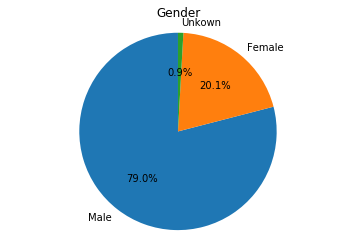

In [70]:
f1, ax1 = plt.subplots()
ax1.pie(list(data['Gender'].value_counts()), 
                   labels=['Male','Female','Unkown'],
                  autopct='%1.1f%%',startangle=90)
ax1.axis('equal')
ax1.set_title("Gender")


,Age
count,1259.000000
mean,32.048451
std,7.663016
min,10.000000
25%,27.000000
50%,31.000000
75%,36.000000
max,80.000000


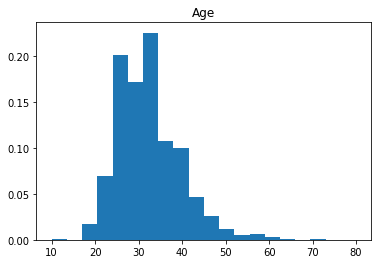

In [71]:
f2, ax2 = plt.subplots()
n, bins, patches = plt.hist(data['Age'],20,weights=np.ones_like(data['Age'].clip(10,80))/len(data['Age'].clip(10,80)),range=(10,80))
ax2.set_title("Age")
age=data['Age'].clip(10,80)
pd.DataFrame(data=age).describe()

3.3 Company profile

Text(0.5,1,'Tech Company?')

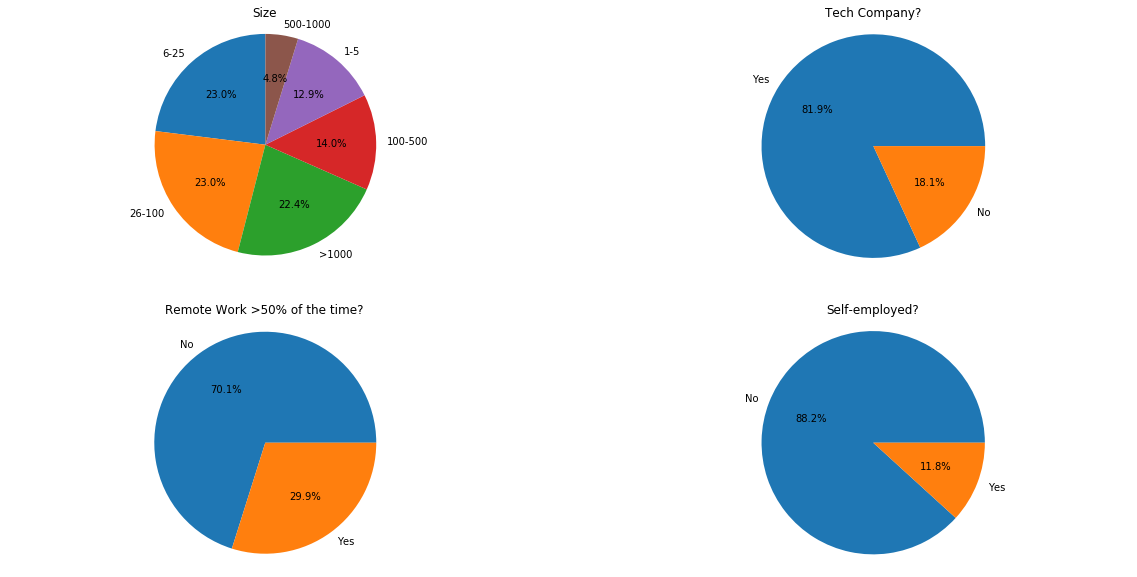

In [72]:
f3, ax3= plt.subplots(nrows=2,ncols=2, figsize=(20,10))
ax3[0,0].pie(list(data['no_employees'].value_counts()), 
                   labels=['6-25', '26-100', '>1000','100-500','1-5','500-1000'],
                  autopct='%1.1f%%', startangle=90)
ax3[1,0].pie(list(data['remote_work'].value_counts()),
                                     labels=['No', 'Yes'],
                                     autopct='%1.1f%%', startangle=0)
ax3[0,1].pie(list(data['tech_company'].value_counts()),
                                     labels=['Yes','No'],
                                     autopct='%1.1f%%', startangle=0)
ax3[1,1].pie(list(data['self_employed'].value_counts()),
                                     labels=['No','Yes'],
                                     autopct='%1.1f%%', startangle=0)
ax3[0,0].axis('equal')
ax3[1,0].axis('equal')
ax3[1,1].axis('equal')
ax3[0,1].axis('equal')
ax3[0,0].set_title('Size') 
ax3[1,0].set_title('Remote Work >50% of the time?')
ax3[1,1].set_title('Self-employed?')
ax3[0,1].set_title('Tech Company?')


3.4 Company policy

Text(0.5,1,'How easy is it for you to take medical leave \n for a mental health condition?')

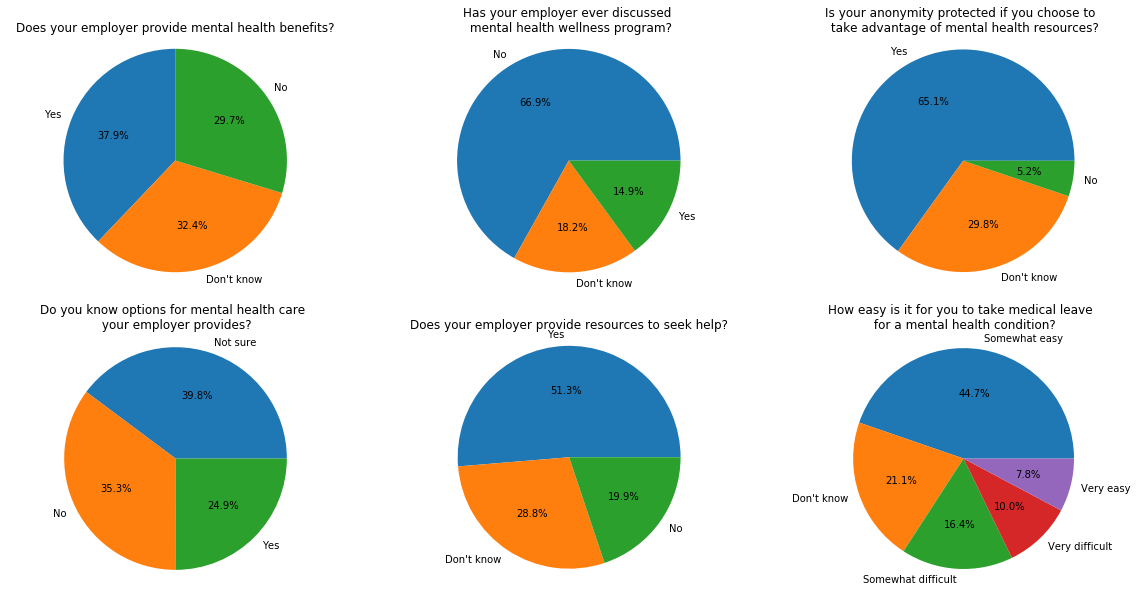

In [73]:
f4, ax4= plt.subplots(nrows=2,ncols=3, figsize=(20,10))
ax4[0,0].pie(list(data['benefits'].value_counts()), 
                   labels=['Yes', "Don't know", 'No'],
                  autopct='%1.1f%%', startangle=90)
ax4[1,0].pie(list(data['care_options'].value_counts()),
                                     labels=['Not sure', 'No', 'Yes'],
                                     autopct='%1.1f%%', startangle=0)
ax4[0,1].pie(list(data['wellness_program'].value_counts()),
                                     labels=['No', "Don't know", 'Yes'],
                                     autopct='%1.1f%%', startangle=0)
ax4[1,1].pie(list(data['seek_help'].value_counts()),
                                     labels=['Yes', "Don't know", 'No'],
                                     autopct='%1.1f%%', startangle=0)
ax4[0,2].pie(list(data['anonymity'].value_counts()),
                                     labels=['Yes', "Don't know", 'No'],
                                     autopct='%1.1f%%', startangle=0)
ax4[1,2].pie(list(data['leave'].value_counts()),
                                     labels=['Somewhat easy', "Don't know", 'Somewhat difficult',
       'Very difficult', 'Very easy'],
                                     autopct='%1.1f%%', startangle=0)
ax4[0,0].axis('equal')
ax4[1,0].axis('equal')
ax4[1,1].axis('equal')
ax4[0,1].axis('equal')
ax4[0,2].axis('equal')
ax4[1,2].axis('equal')


ax4[0,0].set_title('Does your employer provide mental health benefits?') 
ax4[1,0].set_title('Do you know options for mental health care \n your employer provides?')
ax4[1,1].set_title('Does your employer provide resources to seek help?')
ax4[0,1].set_title('Has your employer ever discussed \n mental health wellness program?')
ax4[0,2].set_title('Is your anonymity protected if you choose to \n take advantage of mental health resources?')
ax4[1,2].set_title('How easy is it for you to take medical leave \n for a mental health condition?')

3.5 Willingness to seek mental health help

Text(0.5,1,'Would you bring up a physical health issue \n with a potential employer in an interview?')

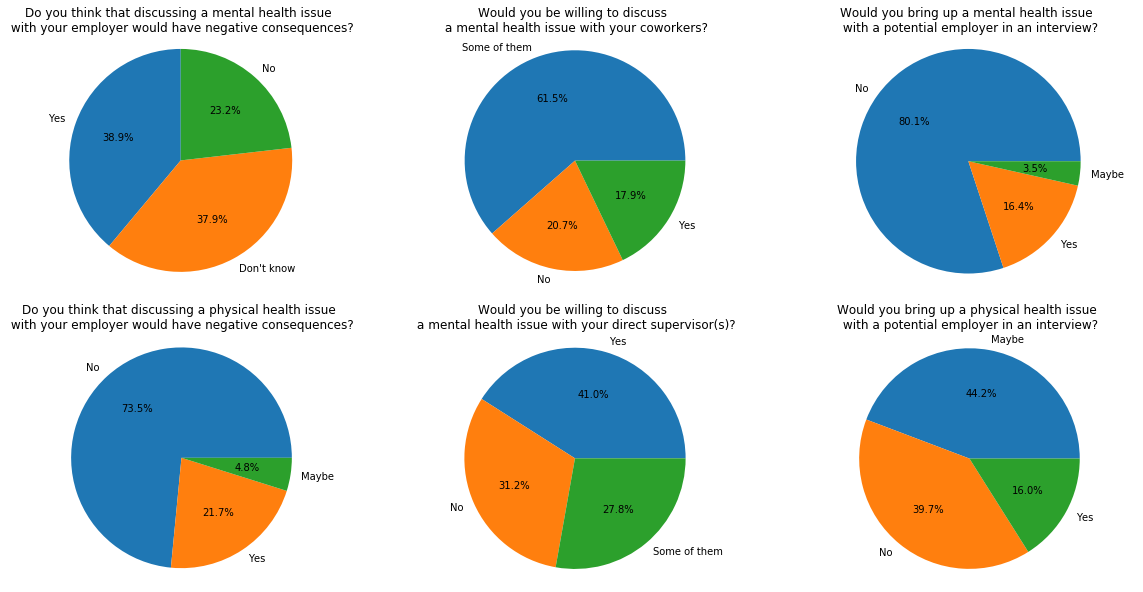

In [74]:
f5, ax5= plt.subplots(nrows=2,ncols=3, figsize=(20,10))
ax5[0,0].pie(list(data['mental_health_consequence'].value_counts()), 
                   labels=['Yes', "Don't know", 'No'],
                  autopct='%1.1f%%', startangle=90)
ax5[1,0].pie(list(data['phys_health_consequence'].value_counts()),
                                     labels=['No', 'Yes', 'Maybe'],
                                     autopct='%1.1f%%', startangle=0)
ax5[0,1].pie(list(data['coworkers'].value_counts()),
                                     labels=['Some of them', 'No', 'Yes'],
                                     autopct='%1.1f%%', startangle=0)
ax5[1,1].pie(list(data['supervisor'].value_counts()),
                                     labels=['Yes', 'No', 'Some of them'],
                                     autopct='%1.1f%%', startangle=0)
ax5[0,2].pie(list(data['mental_health_interview'].value_counts()),
                                     labels=['No', 'Yes', 'Maybe'],
                                     autopct='%1.1f%%', startangle=0)
ax5[1,2].pie(list(data['phys_health_interview'].value_counts()),
                                     labels=['Maybe', 'No', 'Yes'],
                                     autopct='%1.1f%%', startangle=0)
ax5[0,0].axis('equal')
ax5[1,0].axis('equal')
ax5[1,1].axis('equal')
ax5[0,1].axis('equal')
ax5[0,2].axis('equal')
ax5[1,2].axis('equal')


ax5[0,0].set_title('Do you think that discussing a mental health issue \n with your employer would have negative consequences?') 
ax5[1,0].set_title('Do you think that discussing a physical health issue \n with your employer would have negative consequences?')
ax5[1,1].set_title('Would you be willing to discuss \n a mental health issue with your direct supervisor(s)?')
ax5[0,1].set_title('Would you be willing to discuss \n a mental health issue with your coworkers?')
ax5[0,2].set_title('Would you bring up a mental health issue \n with a potential employer in an interview?')
ax5[1,2].set_title('Would you bring up a physical health issue \n with a potential employer in an interview?')

4.Explore correlation between company policy and willingness to seek mental health resources

In [75]:

company_policy = [ "benefits","care_options","wellness_program","seek_help","anonymity","leave"]
willingness=["mental_health_consequence",'phys_health_consequence','coworkers','supervisor','mental_health_interview','phys_health_interview']

#factorize data

In [76]:
def fac(x):
    for i in x:
        if i!='Yes'and i!='No':
            x.replace(i,0,inplace =True)
            break
    x.replace("Yes",1,inplace =True)
    x.replace("No",-1,inplace=True)
def facneg(x):
    for i in x:
        if i!='Yes'and i!='No':
            x.replace(i,0,inplace =True)
            break
    x.replace("Yes",-1,inplace =True)
    x.replace("No",1,inplace=True)

In [77]:
var_3=["benefits","care_options","wellness_program","seek_help","anonymity",'coworkers','supervisor','mental_health_interview','phys_health_interview']
var_neg=["mental_health_consequence",'phys_health_consequence']
#data = pd.read_csv('../input/survey_2014.csv')
for v in var_3:
    fac(data[v])
for v in var_neg:
    facneg(data[v])
data['leave'].replace({'Somewhat easy':1,"Don't know":0,'Somewhat difficult':-1,'Very easy':2,'Very difficult':-2},inplace=True)

data.head()


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,1,0,-1,1,1,1,1,1,0,1,-1,0,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,0,-1,0,0,0,0,0,1,-1,-1,-1,-1,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,-1,-1,-1,-1,0,-1,1,1,1,1,1,1,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,-1,1,-1,-1,-1,-1,-1,-1,0,-1,0,0,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,1,-1,0,0,0,0,1,1,0,1,1,1,Don't know,No,NaN


corr analysis

In [78]:
data[company_policy+willingness].corr()

,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview
benefits,1.000000,0.298130,0.409212,0.490430,0.246840,0.128554,0.036210,0.068316,0.017011,0.043638,-0.033318,-0.096817
care_options,0.298130,1.000000,0.289768,0.276866,0.304109,0.052118,0.024922,-0.004737,0.030227,0.082192,0.011686,-0.033045
wellness_program,0.409212,0.289768,1.000000,0.618131,0.269670,0.153214,0.118701,0.026634,0.075158,0.124800,0.013472,-0.047383
seek_help,0.490430,0.276866,0.618131,1.000000,0.233175,0.120532,0.123873,0.068569,0.031079,0.111424,0.011762,-0.056926
anonymity,0.246840,0.304109,0.269670,0.233175,1.000000,0.242229,0.235854,0.167316,0.115880,0.206102,0.089869,0.050866
leave,0.128554,0.052118,0.153214,0.120532,0.242229,1.000000,0.377881,0.221754,0.219978,0.296032,0.143326,0.023845
mental_health_consequence,0.036210,0.024922,0.118701,0.123873,0.235854,0.377881,1.000000,0.515619,0.443727,0.577153,0.301990,0.075323
phys_health_consequence,0.068316,-0.004737,0.026634,0.068569,0.167316,0.221754,0.515619,1.000000,0.227011,0.327712,0.089832,0.177647
coworkers,0.017011,0.030227,0.075158,0.031079,0.115880,0.219978,0.443727,0.227011,1.000000,0.574310,0.326344,0.144190
supervisor,0.043638,0.082192,0.124800,0.111424,0.206102,0.296032,0.577153,0.327712,0.574310,1.000000,0.324496,0.159597


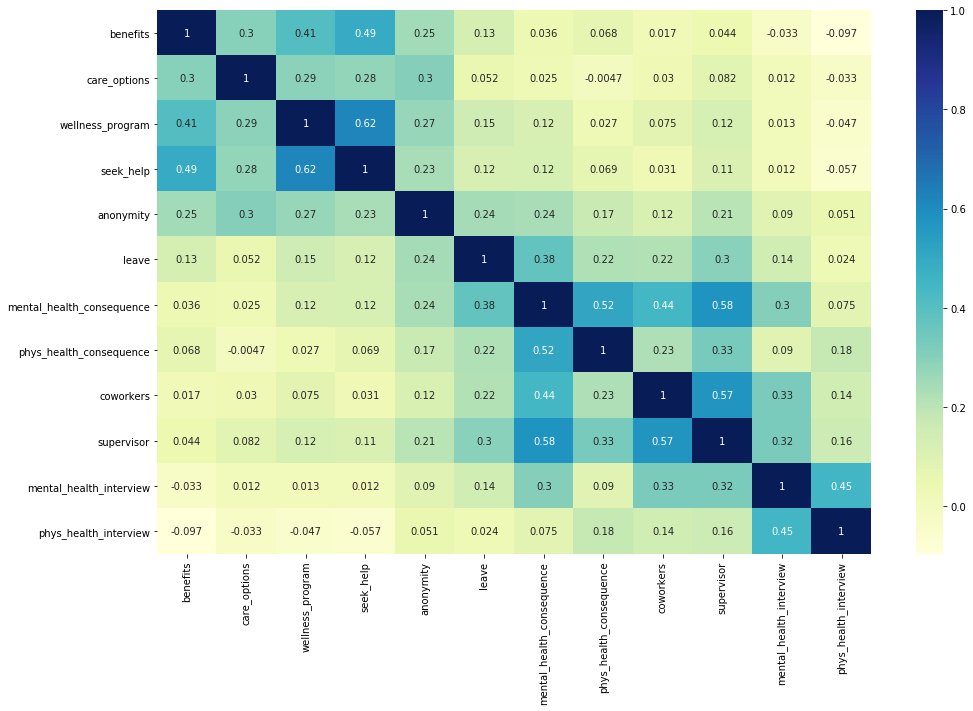

In [79]:
plt.figure(figsize = (16,10))
sns.heatmap(data[company_policy+willingness].corr(),cmap="YlGnBu",cbar=True,annot=True)